In [1]:
from timing_enviroment import *
from pprint import pprint
from methods import *

# Presentación del ambiente


In [2]:
timing = SideChannel_Game(plot= True)
s = timing.estado_inicial
s

''

In [3]:
# Las transiciones posibles para una acción son las posibles letras que se le pueden concatenar.
acciones = timing.acciones_aplicables(s)
transiciones = [timing.transicion(s,i) for i in acciones ]
print(list(zip(acciones, transiciones)))

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'J'), (10, 'K'), (11, 'L'), (12, 'M'), (13, 'N'), (14, 'O'), (15, 'P'), (16, 'Q'), (17, 'R'), (18, 'S'), (19, 'T'), (20, 'U'), (21, 'V'), (22, 'W'), (23, 'X'), (24, 'Y'), (25, 'Z')]


In [4]:
# El caracter retornará verdadero si aprueba el test de contraseña.
s1 = "MAL"
s2 = "BIEN"
s3 = "GOOD"
print(timing.test_objetivo(s1) , timing.test_objetivo(s2) , timing.test_objetivo(s3))

False True False


# Evaluación de los métodos:
## Problemas de la implementación de los métodos:
1. Para implementar el problema como el problema de reconstruir el password mediante un arbol se tuvo el problema de que al intentar construir los pesos de las aristas la solución no converge con muestras menores a 5.000.000 iteraciones, por lo que construir un arbol en este problema no es viable y el problema se convierte en un problema de un entorno completamente observable.
2. Los mejores algoritmos fueron tanto backtracking como greedy search, siendo el mejor greedy search. Sin embargo el algoritmo de greedy search puede fallar.

crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.52it/s]


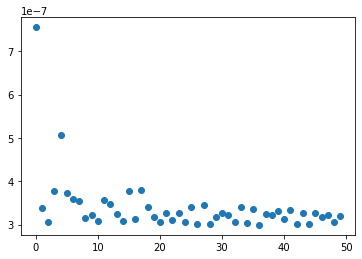

la longitud de la llave es 0  
calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [02:29<00:00,  5.76s/it]

H
Pailas, se equivocó


'Pailas!'

In [5]:
limited_greedy_search(timing)

crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.94it/s]


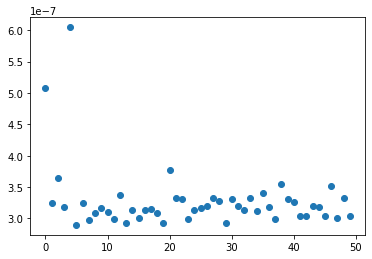

la longitud de la llave es 4  
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
se elegio la opcion B
crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.80it/s]


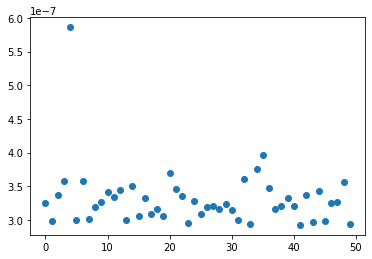

la longitud de la llave es 4  
calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:52<00:00,  4.34s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:51<00:00,  4.29s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:51<00:00,  4.29s/it]


['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ']
se elegio la opcion BB
crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.78it/s]


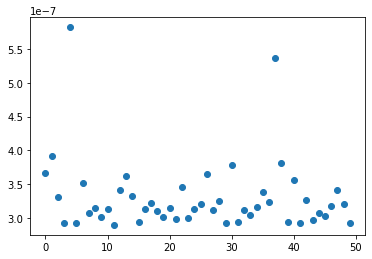

la longitud de la llave es 4  
calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:53<00:00,  4.36s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:54<00:00,  4.41s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:53<00:00,  4.36s/it]


['BA', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ']
se elegio la opcion BF
crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.34it/s]


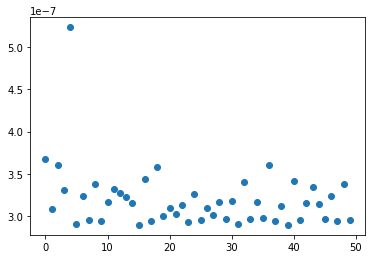

la longitud de la llave es 4  
calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:54<00:00,  4.40s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:54<00:00,  4.42s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:54<00:00,  4.42s/it]


['BA', 'BC', 'BD', 'BE', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ']
se elegio la opcion BR
crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.02it/s]


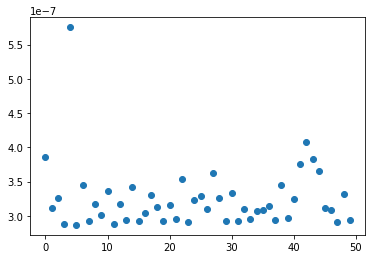

la longitud de la llave es 4  
calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:53<00:00,  4.35s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:53<00:00,  4.37s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:53<00:00,  4.37s/it]


['BA', 'BC', 'BD', 'BE', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ']
se elegio la opcion BJ
crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.04it/s]


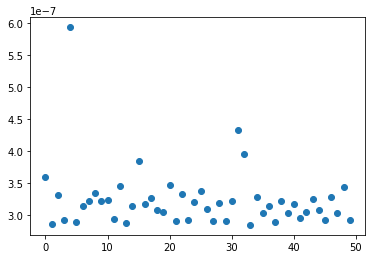

la longitud de la llave es 4  
calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:53<00:00,  4.36s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:52<00:00,  4.34s/it]


calculando resultados...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:52<00:00,  4.33s/it]


['BA', 'BC', 'BD', 'BE', 'BG', 'BH', 'BI', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'BZ']
se elegio la opcion BW
crackeando longitud...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.29it/s]


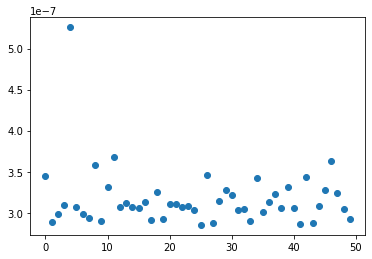

la longitud de la llave es 4  
calculando resultados...


 27%|██████████████████████████▉                                                                         | 7/26 [00:30<01:22,  4.33s/it]

In [ ]:
backtracking(timing)